(array([  5.,   1.,   3.,  21.,   7.,   6.,  60.,  38.,  28., 547.]),
 array([-9.30000019, -8.37000017, -7.44000015, -6.51000013, -5.58000011,
        -4.6500001 , -3.72000008, -2.79000006, -1.86000004, -0.93000002,
         0.        ]),
 <a list of 10 Patch objects>)

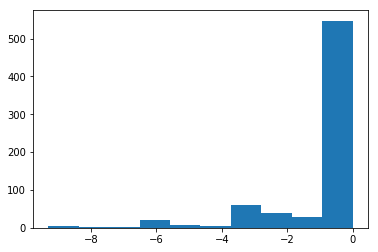

In [20]:
motif = 'AGGAGG'
energyFoldList = compute_hybridization_energy_along_seq(motif, seq, verbose=1)
energyList = [e for fold, e in energyFoldList]
plt.hist(energyList)

In [33]:
energyThres = -4.
energy = np.array(energyList)
energy < energyThres

energyLow = np.array([(i, x) for i, x in enumerate(energy) if x < energyThres])
energyLow

array([[238.        ,  -5.9000001 ],
       [239.        ,  -6.30000019],
       [240.        ,  -5.9000001 ],
       [424.        ,  -4.5       ],
       [425.        ,  -5.5999999 ],
       [426.        ,  -6.        ],
       [427.        ,  -8.60000038],
       [428.        ,  -9.30000019],
       [429.        ,  -6.        ],
       [430.        ,  -6.        ],
       [431.        ,  -5.5999999 ],
       [562.        ,  -5.19999981],
       [563.        ,  -8.19999981],
       [564.        ,  -9.30000019],
       [565.        ,  -6.        ],
       [566.        ,  -6.        ],
       [567.        ,  -5.5999999 ],
       [582.        ,  -5.9000001 ],
       [583.        ,  -8.60000038],
       [584.        ,  -8.80000019],
       [585.        ,  -5.0999999 ],
       [587.        ,  -4.4000001 ],
       [589.        ,  -5.80000019],
       [590.        ,  -6.80000019],
       [591.        ,  -6.4000001 ],
       [592.        ,  -4.69999981],
       [593.        ,  -5.0999999 ],
 

In [42]:
energyLowFiltered = clustering_1D_meanshift(x=energyLow[:, 0], bandwidth=5, verbose=2)
energyLowFiltered

cluster 0: [424 425 426 427 428 429 430 431] centroid: 428
cluster 1: [582 583 584 585 587] centroid: 584
cluster 2: [589 590 591 592 593 594] centroid: 592
cluster 3: [562 563 564 565 566 567] centroid: 565
cluster 4: [679 680 681 682 683 684] centroid: 682
cluster 5: [238 239 240] centroid: 239
cluster 6: [648 649 650] centroid: 649
cluster 7: [697 698 699] centroid: 698
len(x): 40 len(centroidList) 8


array([239, 428, 565, 584, 592, 649, 682, 698])

In [ ]:
def find_local_extrema(arr, verbose=1):
    
    energyNonZeroPos = [(i, x) for i, x in enumerate(energyArr) if x < 0]
    energyNonZero = [x for i, x in energyNonZeroPos]
    energyNonZeroIndices = [i for i, x in energyNonZeroPos]
    energyLocalMinima = argrelextrema(np.array(energyNonZero), np.less_equal)[0]
    energyMinimaIndices = [energyNonZeroIndices[i] for i in list(energyLocalMinima)]
    energyMinima = [(i, energyArr[i]) for i in energyMinimaIndices]
    return energyMinima

In [2]:
def search_triplet_motif_tags(fseq, triplet, showTripletScale=False):
    
    seq = fseq.seq
    tripletMatch = find_triplet_in_sequence_in_frames(seq, triplet)    
    
    tagList = [
        {'start': match['nucleotide_pos'], 'end':match['nucleotide_pos'] + 3,
         'class':'frame{:d}'.format(frame)}
        for frame, tripletList in enumerate(tripletMatch)
        for match in tripletList]

    return tagList


def search_hybridization_energy_motif_tags(fseq, motif, motifName='ShineDalgarno', thresh1=-2, thresh2=-4):
    
    seq = fseq.seq
    motif = SDCore[0]
    energyMinima = find_motif_positions_with_low_energy(seq, motif, verbose=1)
    motifList1 = [i for i, e in energyMinima if thresh2 < e <= thresh1]
    motifList2 = [i for i, e in energyMinima if e <= thresh2]
#     print("motifList1", motifList1)
#     print("motifList2", motifList2)
    tagList = []
    if len(motifList1) > 0:
        tagList += [
            {'start':i, 'end':i + len(motif) - 1,
             'class':motifName + '_weak'}
            for i in motifList1]
    if len(motifList2) > 0:
        tagList += [
            {'start':i, 'end':i + len(motif) - 1,
             'class':motifName + '_strong'}
            for i in motifList2]
    return tagList